In [18]:
#Modules to install via pip pandas,ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pprint import pprint
import os
import import_ipynb
import sys
import kmeans
sys.path.append('../')
from functions import *
from trace_analysis import *
from plots import *
from trace_analysis_cooja2 import *
from node import *
from pandas.plotting import scatter_matrix
import cmath as math
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster
from sklearn.metrics import confusion_matrix
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
# scipy
from scipy.cluster.vq import kmeans,vq,whiten
import sklearn.metrics as sm
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline
import random
random.seed(6666)

In [28]:
directory=os.getcwd()[:-6]+ "iot-lab-25nodes/traces/"
print(directory)
#+ "/iot-lab-25nodes/traces/"
tracefiles=[
    "2019-01JAN-30-1",
    "2019-01JAN-30-1b169",
    "2019-01JAN-30-1b169b153b182",
    "2019-01JAN-30-2",
    "2019-01JAN-30-3b113b122b145b166b185"
]

data = importIOTData(directory,tracefiles)
cases=tracefiles
casesAccuracy=[
    "normal",
    "BH",
    "BH",
    "normal",
    "BH"
]

/home/fedebyes/Workspace/Master Thesis/iot-netprofiler/iot-lab-25nodes/traces/
Importing /home/fedebyes/Workspace/Master Thesis/iot-netprofiler/iot-lab-25nodes/traces/2019-01JAN-30-1


../trace_analysis.py:72: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)


Importing /home/fedebyes/Workspace/Master Thesis/iot-netprofiler/iot-lab-25nodes/traces/2019-01JAN-30-1b169
Importing /home/fedebyes/Workspace/Master Thesis/iot-netprofiler/iot-lab-25nodes/traces/2019-01JAN-30-1b169b153b182
Importing /home/fedebyes/Workspace/Master Thesis/iot-netprofiler/iot-lab-25nodes/traces/2019-01JAN-30-2
Importing /home/fedebyes/Workspace/Master Thesis/iot-netprofiler/iot-lab-25nodes/traces/2019-01JAN-30-3b113b122b145b166b185


[97, 100, 91, 100, 98]


In [31]:

pings=getPings(data)
#All data collection is in variable node that is a list of list of nodes
#3 nets input x 9 nodes by net

d={ "label":[],
   "type":[],
    "count":[],
    "std":  [],
    "mean": [],
    "var":  [],
    #"25%":  [],
    #"50%":[],
    #"75%":[],
   #"min":[],
   #"max":[],
   "hop":[],
   #"missing":[],
   "packet loss":[],
   "outliers":[],
   "node":[]
}
#count=[]
labels=[]
var=[]
#window=100
#stats=pd.DataFrame(columns=columns)
#rows=[count,labels]
for i in range(len(data)):
    #window=pings[i]
    
    for j in range(len(data[i])):
        n=pings[i]
        #n=100
        window=n
        #print(n)
        for z in range(0,n,int(window)):
            if(z+window>n):break
            #print(z,z+window)
            
            #df1 = df1.assign(e=p.Series(np.random.randn(sLength)).values)
            node=data[i][j].pkts
            name=str(j)+" "+cases[i]
            nodeWindow=node[(node["seq"]<z+window) & (node["seq"]>=z)]
            
            nodeWindowP=nodeWindow["rtt"]
            #df1 = df1.assign(e=p.Series(np.random.randn(sLength)).values)
            #if(nodeWindowP.count()<window/2): break
            #current=data[i][j].pkts['rtt'][z:z+window]
            #print(nodeWindow.shape)
            d["count"].append(nodeWindowP.count())
            #Case without outliers
            #d["std"].append(getStdValues(data[i][j].pkts)["rtt"].std())

            #Case with outliers
            d["std"].append(nodeWindowP.std())

            d["mean"].append(nodeWindowP.mean())
            d["var"].append(nodeWindowP.var())
            d["label"].append(cases[i])
            #d["25%"].append(nodeWindow.describe()["25%"])
            #d["50%"].append(nodeWindow.describe()["50%"])
            #d["75%"].append(nodeWindow.describe()["75%"])
            #d["min"].append(nodeWindow.describe()["min"])
            #d["max"].append(nodeWindow.describe()["max"])
            d["hop"].append(data[i][j].hop)
            d["type"].append(casesAccuracy[i])
            d["outliers"].append(getOutliers(nodeWindow)["rtt"].count())
            missing=window-nodeWindow.count()
            d["node"].append(data[i][j].ip)
            d["packet loss"].append(getPercentageMissingPackets(nodeWindow,window))

            
            
stats=pd.DataFrame(d)            

stats
print(stats.shape)
stats=stats.dropna()
print(stats.shape)
        
        

#correction=np.array(correction)
#correction_alt=np.array(correction_alt)

dataK=stats.drop([
    "label","mean","var",
    "packet loss",
    "hop",
    "count","node","type"],axis=1)

(97, 10)
(77, 10)


In [16]:
data=stats.drop([
    "label","mean","var","packet loss","count","node","type","hop"],axis=1)

dataC=stats["label"]

#Y = data[['var']]
#X = data[['std']]

In [36]:
data.head()



,label,count,std,mean,var,25%,50%,75%,min,max,hop,missing
0,2019-01JAN-30-1,22,12.309208,47.923455,151.516594,39.13550,45.2130,56.78225,24.595,77.839,2,75
1,2019-01JAN-30-1,33,12.100024,32.293697,146.410582,27.66200,31.4940,39.04900,2.075,66.558,2,64
2,2019-01JAN-30-1,11,17.726896,28.218909,314.242825,22.10500,25.9130,29.80050,2.231,75.869,2,86
3,2019-01JAN-30-1,14,10.435536,34.183357,108.900403,26.44875,31.2525,40.76275,20.433,57.356,2,83
4,2019-01JAN-30-1,74,7.851532,24.791865,61.646552,20.43575,22.8070,25.74275,15.382,69.188,2,23
5,2019-01JAN-30-1,28,11.868332,28.519786,140.857306,24.11975,29.0005,33.90375,1.143,61.212,2,69
6,2019-01JAN-30-1,76,9.748921,27.164579,95.041466,20.05450,24.8670,30.56300,16.290,66.194,2,21
7,2019-01JAN-30-1,40,8.876356,26.341075,78.789692,20.97100,23.4315,28.47450,16.910,54.921,2,57
8,2019-01JAN-30-1,61,14.124348,26.636967,199.497193,18.87900,21.8920,33.39300,2.023,64.935,1,36
9,2019-01JAN-30-1,53,10.607889,28.330887,112.527317,21.45100,26.2250,31.63800,17.623,81.920,2,44


In [23]:
def accuracy_score_corrected(correction,labels):
    print(np.array(correction))
    labels_alt=[]
    for el in labels:
        if (el==0):
            labels_alt.append(1)
        elif el==1:
            labels_alt.append(0)
    
    accuracy=sm.accuracy_score(correction, labels)
    accuracy_alt=sm.accuracy_score(correction, labels_alt)
    #print(correction)
    if (accuracy>accuracy_alt): 
        print(accuracy)
        
    else: 
        print(accuracy_alt)
        labels=labels_alt
    print(np.array(labels))
    confusionMatrix=sm.confusion_matrix(correction, labels)
    
    pprint(confusionMatrix)
    return labels
    
    

In [33]:




correction=[]
correction_alt=[] #fr 3 cluster 0:normal net 1:bh net 2:bh
col=np.array(stats["type"])
#Creating simple array to correct unsupervised learning
#NB as it is unsupervised could happen that the correction are inverted
for i in range(len(col)):
    el=d["type"][i]
    if el=="normal":
        correction.append(1)
        correction_alt.append(0)
        
    else:
        #print(el=="BH2" and i==BlackHole[2])
        correction.append(0)
        correction_alt.append(1)
                        

dataC=stats["label"]

#Y = data[['var']]
#X = data[['std']]

kmeans = KMeans(n_clusters=2)
kmeans.fit(dataK)
labels = kmeans.predict(dataK)
centroids = kmeans.cluster_centers_
labels=accuracy_score_corrected(correction,labels)
predicted=[]
for i in range(len(labels)):
    
    if(labels[i]==1):
        predicted.append("normal")
    else: predicted.append("BH")

#print(len(predicted))
stats["predicted"]=pd.Series(np.array(predicted))
stats["predicted number"]=pd.Series(np.array(labels))
stats["correction number"]=pd.Series(np.array(correction))
stats_csv=stats[[
    "label",
    "type",
    "predicted",
    #"packet loss",
    "outliers",
    "std",
    "hop",
    "node"
      
      
      ]]
#stats_csv.to_csv("results_kmeans.csv", sep='\t', encoding='utf-8')
stats.head()


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
0.5454545454545454
[1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 1]
array([[22, 16],
       [19, 20]])


,label,type,count,std,mean,var,hop,packet loss,outliers,node,predicted,predicted number,correction number
0,2019-01JAN-30-1,normal,22,12.309208,47.923455,151.516594,2,77.319588,1,m3-105,normal,1.0,1.0
1,2019-01JAN-30-1,normal,33,12.100024,32.293697,146.410582,2,65.979381,3,m3-113,normal,1.0,1.0
2,2019-01JAN-30-1,normal,11,17.726896,28.218909,314.242825,2,88.659794,1,m3-118,normal,1.0,1.0
3,2019-01JAN-30-1,normal,14,10.435536,34.183357,108.900403,2,85.567010,1,m3-126,normal,1.0,1.0
4,2019-01JAN-30-1,normal,74,7.851532,24.791865,61.646552,2,23.711340,1,m3-129,BH,0.0,1.0


In [34]:
net_results={
   "case":[],
    "predicted":[],
    "real":[]
}
#print(stats["predicted number"])
for case in range(len(cases)):
    subset=stats[stats["label"]==cases[case]]
    mean_predicted=str(subset["predicted number"].mean()*100)+"% normal"
    net_results["case"].append(cases[case])
    net_results["predicted"].append(mean_predicted)
    net_results["real"].append(casesAccuracy[case])

    
results=pd.DataFrame(net_results)  

results

,case,predicted,real
0,2019-01JAN-30-1,60.0% normal,normal
1,2019-01JAN-30-1b169,44.44444444444444% normal,BH
2,2019-01JAN-30-1b169b153b182,66.66666666666666% normal,BH
3,2019-01JAN-30-2,41.17647058823529% normal,normal
4,2019-01JAN-30-3b113b122b145b166b185,nan% normal,BH


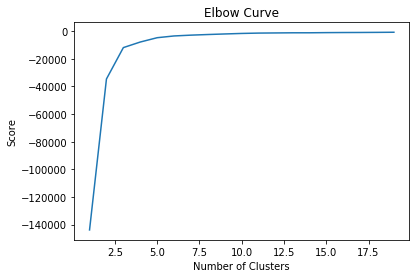

In [38]:
Y=data
Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]

score

plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()


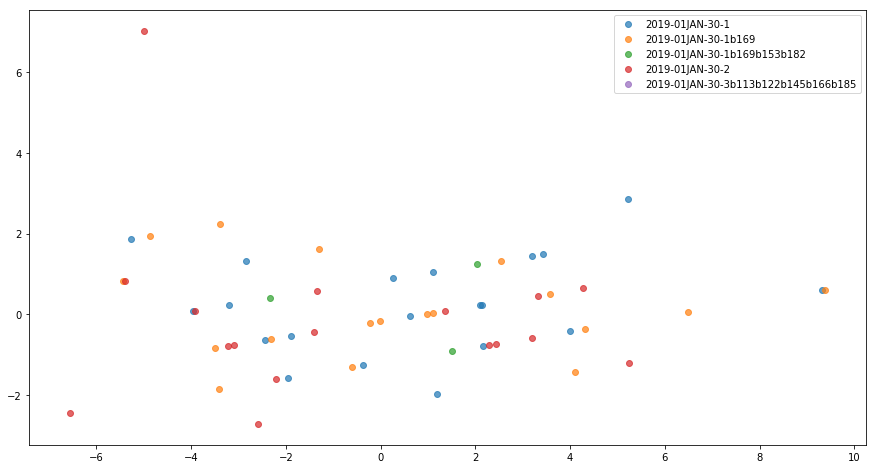

In [37]:
X = dataK.iloc[:,0:4]
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)

dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['labels'] = stats['label']
dfPCA.head()

labels = stats['label'].unique().tolist()
plt.figure(figsize=(15,8))
for lab in labels:
    plt.scatter(dfPCA.loc[dfPCA['labels'] == lab, 'x1'],  dfPCA.loc[dfPCA['labels'] == lab, 'x2'], label=lab, alpha=0.7)
    plt.legend()

In [38]:
stats

,label,type,count,std,mean,var,hop,packet loss,outliers,node,predicted,predicted number,correction number
0,2019-01JAN-30-1,normal,22,12.309208,47.923455,151.516594,2,77.319588,1,m3-105,normal,1.0,1.0
1,2019-01JAN-30-1,normal,33,12.100024,32.293697,146.410582,2,65.979381,3,m3-113,normal,1.0,1.0
2,2019-01JAN-30-1,normal,11,17.726896,28.218909,314.242825,2,88.659794,1,m3-118,normal,1.0,1.0
3,2019-01JAN-30-1,normal,14,10.435536,34.183357,108.900403,2,85.567010,1,m3-126,normal,1.0,1.0
4,2019-01JAN-30-1,normal,74,7.851532,24.791865,61.646552,2,23.711340,1,m3-129,BH,0.0,1.0
5,2019-01JAN-30-1,normal,28,11.868332,28.519786,140.857306,2,71.134021,3,m3-134,normal,1.0,1.0
6,2019-01JAN-30-1,normal,76,9.748921,27.164579,95.041466,2,21.649485,3,m3-137,normal,1.0,1.0
7,2019-01JAN-30-1,normal,40,8.876356,26.341075,78.789692,2,58.762887,3,m3-142,normal,1.0,1.0
8,2019-01JAN-30-1,normal,61,14.124348,26.636967,199.497193,1,37.113402,4,m3-145,normal,1.0,1.0
9,2019-01JAN-30-1,normal,53,10.607889,28.330887,112.527317,2,45.360825,2,m3-150,normal,1.0,1.0
